In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import torch

from IPython.display import set_matplotlib_formats, clear_output
set_matplotlib_formats('retina')
plt.style.use('ggplot')

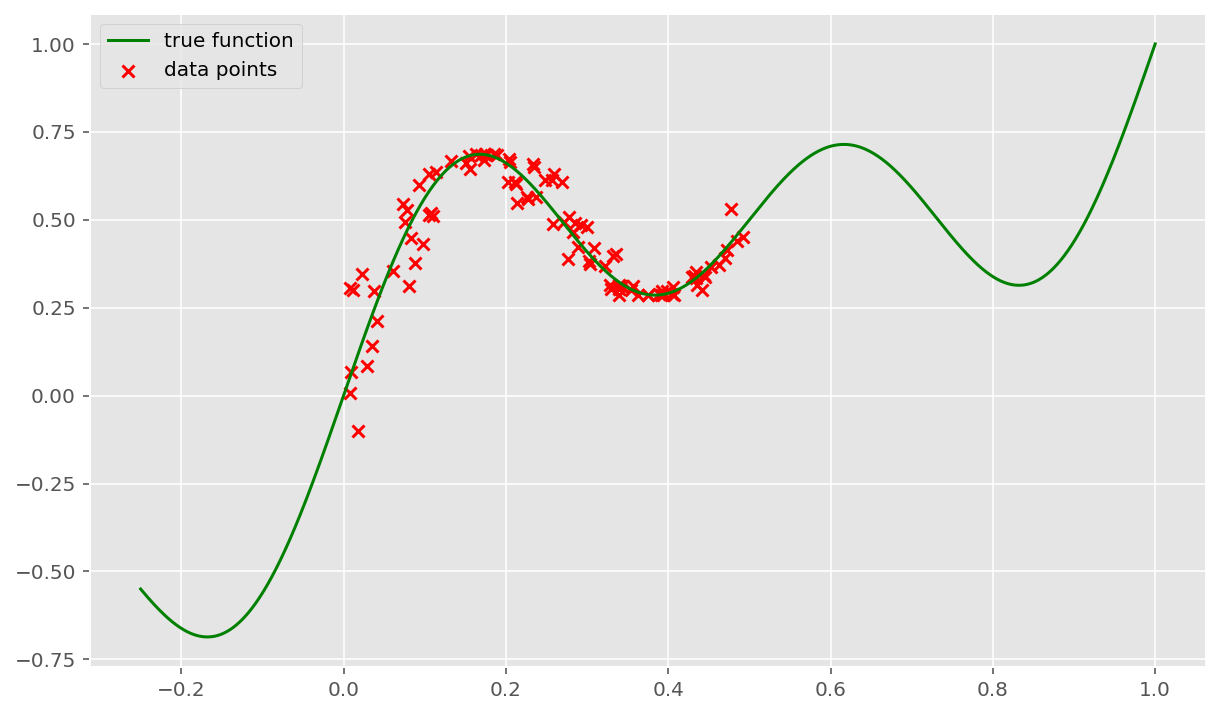

In [2]:
N = 100 #number of data points
sigma = 0.02
dataset = {}

def function(x , epsilon):
    return x + 0.3*np.sin(2*np.pi*(x + epsilon)) + 0.3*np.sin(4*np.pi*(x + epsilon)) + epsilon

dataset['X_train'] = np.random.uniform(0 , 0.5 , N)
dataset['y_train'] = function(dataset['X_train'] , np.random.normal(0 , sigma , N))

dataset['X_test'] = np.linspace(-0.25 , 1 , 1000)
F = function(dataset['X_test'] , 0)

plt.figure(figsize = (10 , 6))
plt.plot(dataset['X_test'] , F , color = 'green' , label = 'true function')
plt.scatter(dataset['X_train'] , dataset['y_train'] , marker = 'x' , color = 'red' , label = 'data points')
plt.legend()

In [3]:
X_train_tensor = torch.from_numpy(dataset['X_train'].copy()).float().unsqueeze(dim=1)
y_train_tensor = torch.from_numpy(dataset['y_train'].copy()).float()
X_test_tensor = torch.from_numpy(dataset['X_test'].copy()).float().unsqueeze(dim=1)

In [4]:
import bbb_regression_pyro as pybbb

In [6]:
## Definition of the model
from pyro.infer.autoguide import AutoDiagonalNormal , init_to_feasible
prior_parameters = {'sigma1': 1, 'sigma2': np.exp(-6) , 'pi': 0.5}
model = pybbb.BayesianRegression(in_features = 1, out_features = 1 , hidden_size= 100
                                 , prior_parameters = prior_parameters)
guide = AutoDiagonalNormal(model ,  init_loc_fn=init_to_feasible)
reg_model = pybbb.PyroReg_SVI(X_train_tensor , y_train_tensor , X_test_tensor , model , guide)

In [7]:
## Training step
import pyro
optimizer = pyro.optim.Adam({"lr": 0.01 , "weight_decay":1e-6})
reg_model.train(5000 ,  optimizer)

[iteration 0000] loss: 602.2817
[iteration 0100] loss: 328.0569
[iteration 0200] loss: 321.6246
[iteration 0300] loss: 248.5541
[iteration 0400] loss: 224.1424
[iteration 0500] loss: 317.9456
[iteration 0600] loss: 213.4656
[iteration 0700] loss: 191.1028
[iteration 0800] loss: 177.5108
[iteration 0900] loss: 156.9373
[iteration 1000] loss: 184.2575
[iteration 1100] loss: 173.4933
[iteration 1200] loss: 138.3761
[iteration 1300] loss: 183.5217
[iteration 1400] loss: 159.1870
[iteration 1500] loss: 140.8860
[iteration 1600] loss: 142.1032
[iteration 1700] loss: 135.3544
[iteration 1800] loss: 125.7238
[iteration 1900] loss: 136.2542
[iteration 2000] loss: 133.9945
[iteration 2100] loss: 102.7730
[iteration 2200] loss: 118.9180
[iteration 2300] loss: 141.1505
[iteration 2400] loss: 113.5386
[iteration 2500] loss: 119.6859
[iteration 2600] loss: 133.0006
[iteration 2700] loss: 130.3448
[iteration 2800] loss: 129.7990
[iteration 2900] loss: 109.7054
[iteration 3000] loss: 129.9919
[iterati

In [8]:
## Test step
reg_model.predict(n_samples = 1000)

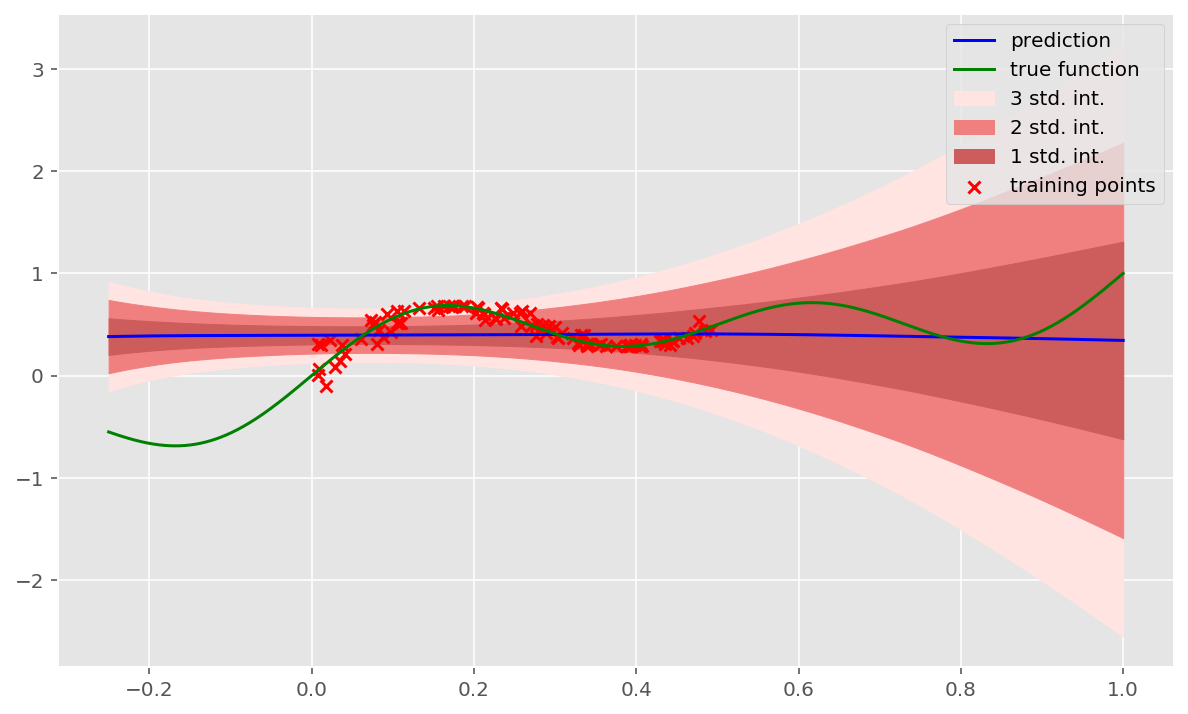

In [9]:
## Plot results
plt.figure(figsize = (10 , 6))
reg_model.plot_results()
plt.plot(dataset['X_test'] , F , color = 'green' , label = 'true function')
plt.legend()